# multiple linear regression 


### importing libraries

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

### extracting dataframe

In [8]:
data = fetch_california_housing(as_frame =True)
df = pd.DataFrame(data.frame)
features=df.columns.tolist()
price = data.target
size = 20640
train_size = (int)(0.8*size)
test_size = size - train_size
df.head()
print(price[10])

2.815


### orignal_data

In [9]:
original_medinc=np.array(df['MedInc'])
original_HouseAge=np.array(df['HouseAge'])
original_AveRooms=np.array(df['AveRooms'])
original_AveBedrms = np.array(df['AveBedrms'])
original_Population=np.array(df['Population'])
original_AveOccup = np.array(df['AveOccup'])
original_Latitude=np.array(df['Latitude'])
original_Longitude = np.array(df['Longitude'])
original_MedHouseVal = np.array(df['MedHouseVal'])


# scaling data


In [10]:
scaled_data = df.copy()
features_mean = np.zeros(9)
features_std = np.zeros(9)
i=0
for x in features:
    m = df[x].mean()
    sd = df[x].std()
    scaled_data[x] = (df[x] - m) / sd
    features_mean[i]=m
    features_std[i]=sd
    i+=1
scaled_data
price_mean = np.mean(price)
price_std = np.std(price)
scaled_price = (price-np.mean(price))/np.std(price)

# extract all features

In [11]:
medinc=np.array(scaled_data['MedInc'])
HouseAge=np.array(scaled_data['HouseAge'])
AveRooms=np.array(scaled_data['AveRooms'])
AveBedrms = np.array(scaled_data['AveBedrms'])
Population=np.array(scaled_data['Population'])
AveOccup = np.array(scaled_data['AveOccup'])
Latitude=np.array(scaled_data['Latitude'])
Longitude = np.array(scaled_data['Longitude'])
MedHouseVal = np.array(scaled_data['MedHouseVal'])
no_features=10

# split train and test data

In [12]:
# training data
train_price =np.array( scaled_price[:train_size])
train_medinc=np.array(medinc[:train_size])
train_HouseAge=np.array(HouseAge[:train_size])
train_AveRooms=np.array(AveRooms[:train_size])
train_AveBedrms = np.array(AveBedrms[:train_size])
train_Population=np.array(Population[:train_size])
train_AveOccup = np.array(AveOccup[:train_size])
train_Latitude = np.array(Latitude[:train_size])
train_Longitude = np.array(Longitude[:train_size])
train_MedHouseVal = np.array(MedHouseVal[:train_size])

train_data1 = np.vstack((train_medinc,train_HouseAge,train_AveRooms,train_AveBedrms,train_Population,train_AveOccup,train_Latitude,train_Longitude,train_MedHouseVal,np.ones(train_size)))

test_price =np.array( scaled_price[train_size:])
test_medinc=np.array(medinc[train_size:])
test_HouseAge=np.array(HouseAge[train_size:])
test_AveRooms=np.array(AveRooms[train_size:])
test_AveBedrms = np.array(AveBedrms[train_size:])
test_Population=np.array(Population[train_size:])
test_AveOccup = np.array(AveOccup[train_size:])
test_Latitude = np.array(Latitude[train_size:])
test_Longitude = np.array(Longitude[train_size:])
test_MedHouseVal = np.array(MedHouseVal[train_size:])
test_data = np.vstack((test_medinc,test_HouseAge,test_AveRooms,test_AveBedrms,test_Population,test_AveOccup,test_Latitude,test_Longitude,test_MedHouseVal))



### prediction straight line equation
**price = a\*a_ + b\*b_ + c\*c_ + d\*d_ + e\*e_ + f\*f_ + g\*g_ h\*h_ + const**   
*x => coefficient of variable x*   
*x_ => variable x*   
- a -> 'MedInc'  
- b -> 'HouseAge'   
- c -> 'AveRooms'   
- d -> 'AveBedrms'    
- e -> 'Population'    
- f -> 'AveOccup'
- g -> 'Latitude'    
- h -> 'Longitude'   
- i -> 'MedHouseVal

In [13]:
def der_loss(price ,cf_features,train_size,k,train_data):
    diff=0
    error = np.zeros(train_size)
    for i in range (0,train_size):
        predicted_price= (cf_features[0]*train_data[0][i]) + (cf_features[1]*train_data[1][i]) + (cf_features[2]*train_data[2][i]) + (cf_features[3]*train_data[3][i]) + (cf_features[4]*train_data[4][i]) + (cf_features[5]*train_data[5][i]) +( cf_features[6]*train_data[6][i] )+ (cf_features[7]*train_data[7][i]) + (cf_features[8]*train_data[8][i]) + cf_features[9]
        error[i] = (-price[i]+predicted_price)*train_data[k][i]
    return np.average(error)


In [14]:
learn_rate = 0.01
cf_features = np.ones(no_features)
for i in range (0,1000):
    #loss=der_loss(train_medinc,train_AveBedrms,train_AveOccup,train_AveRooms,train_HouseAge,train_Latitude,train_Longitude,train_MedHouseVal,train_Population,train_price ,cf_features,train_size)
    cf_features[0]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,0,train_data1,))
    cf_features[1]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,1,train_data1,))
    cf_features[2]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,2,train_data1,))
    cf_features[3]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,3,train_data1,))
    cf_features[4]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,4,train_data1,))
    cf_features[5]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,5,train_data1,))
    cf_features[6]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,6,train_data1,))
    cf_features[7]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,7,train_data1,))
    cf_features[8]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,8,train_data1,))
    cf_features[9]-= (learn_rate*2*der_loss(train_price,cf_features,train_size,9,train_data1,))

# testing model

### predict price and scale back to original values

In [25]:
actual_price = np.array(price[train_size:])
scaled_predicted_price = np.zeros(test_size)
print(type(scaled_predicted_price))
print(len(scaled_predicted_price))
for i in range (0,test_size):
    scaled_predicted_price[i] = (cf_features[0]* test_data[0][i])+(cf_features[1]* test_data[1][i])+(cf_features[2]* test_data[2][i])+(cf_features[3]* test_data[3][i])+(cf_features[4]* test_data[4][i])+(cf_features[5]* test_data[5][i])+(cf_features[6]* test_data[6][i])+(cf_features[7]* test_data[7][i])+(cf_features[8]* test_data[8][i])+cf_features[9]
actual_predicted_price = (scaled_predicted_price*np.std(price))+np.mean(price)

<class 'numpy.ndarray'>
4128


### evalution of model

In [26]:
### calculating MSE
error = np.zeros(test_size)
for i in range (0,test_size):
    error[i]= (actual_price[i]-actual_predicted_price[i])**2
mse = np.sum(error)/test_size

print(mse)
# rmse
rmse = math.sqrt(mse)
print(rmse)

0.05158303432459595
0.2271189871512198


In [27]:
print(actual_predicted_price[0])
print(actual_price[0])

1.6354773121613355
1.656


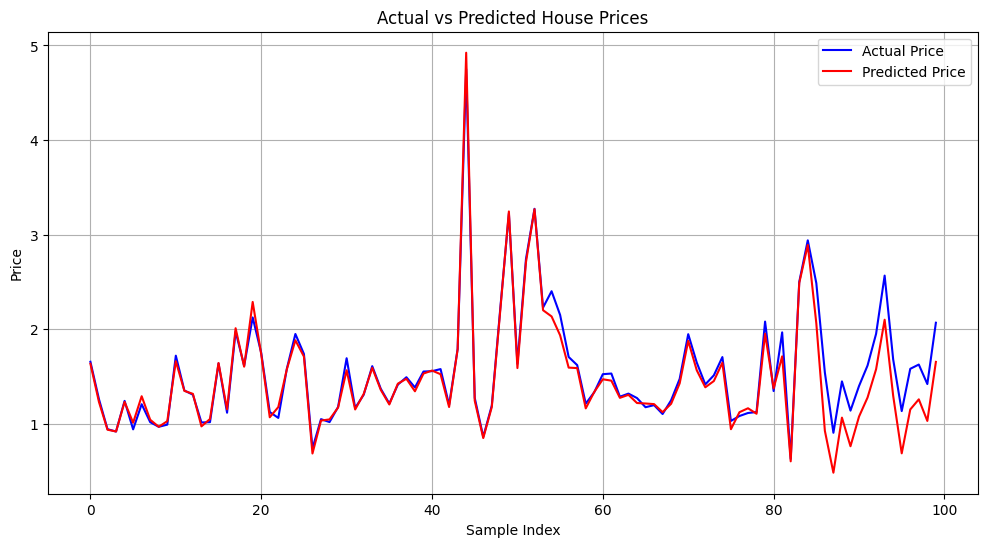

In [28]:
import matplotlib.pyplot as plt

# Plot actual vs predicted price
plt.figure(figsize=(12, 6))
plt.plot(actual_price[:100], label='Actual Price', color='blue')
plt.plot(actual_predicted_price[:100], label='Predicted Price', color='red')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
for i in range(0,9):
    print(test_data[i][5])

-0.5928824753752109
0.18755732869712857
-0.5323940411924901
-0.005396589908654656
-0.8525466111670129
-0.0351214197766116
1.0150687667350033
-0.8187020566702551
-0.9762573392001226


### store trained model

In [20]:
import json
cf_features_list = cf_features[:9].tolist()
model_data={
    "features" : features,
    "co-efficients" : cf_features_list,
    "intercept" : cf_features[9],
    "mse" : mse,
    "rmse" : rmse,
    "features_mean" : features_mean.tolist(),
    "features_std" : features_std.tolist(),
    "price_mean" : price_mean,
    "price_std" : price_std
}
with open("custom_mlr_model.json",'w') as f:
    json.dump(model_data , f)

In [21]:
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


### Load model

In [22]:
import json
with open("custom_mlr_model.json",'r') as f:
    model_data = json.load(f)
    co_efficients_data = model_data['co-efficients']
    intercept = model_data['intercept']
    features_mean_data = model_data['features_mean']
    features_std_data = model_data['features_std']
    price_mean_data = model_data['price_mean']
    price_std_data = model_data['price_std']



In [23]:
# test data

test_list = [original_medinc[i],original_HouseAge[i],original_AveRooms[i],original_AveBedrms[i],original_Population[i],original_AveOccup[i],original_Latitude[i],original_Longitude[i],original_MedHouseVal[i]]
test = np.array(test_list)
scaled_test= np.zeros(9)
for i in range (0,9):
    scaled_test[i]= (test[i]-features_mean_data[i])/features_std_data[i]



### predict price

In [24]:
test_pred_price_scaled =0
for i in range(0,9):
    test_pred_price_scaled+= (co_efficients_data[i]*scaled_test[i])
test_pred_price_scaled+=intercept
test_pred_price = (test_pred_price_scaled*price_std_data)+price_mean_data
print("predicted_price :")
print(test_pred_price)

predicted_price :
2.1764379119489368
